In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats # stats package    

import random # modul to set seed // random.seed(n)

import matplotlib.pyplot as plt

%matplotlib inline

## Discrete Time Approximations:

### Euler Scheme

$ dS_t = \mu (S_t) dt + \sigma (S_t) dW_t$

In [2]:
def euler_scheme(n, mu,vol):
    
    dt = 1/252
    dw = stats.norm.rvs(size = n)*np.sqrt(dt)
    s_euler=np.zeros(n)
    s_euler[0] = 100
    for t in range(1,n):
        s_euler[t] = s_euler[t-1]+ s_euler[t-1] * mu *dt + s_euler[t-1]* vol * dw[t-1]
    return s_euler

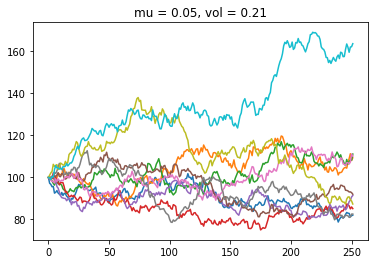

In [3]:

for t in range(10):
    plt.plot(euler_scheme(252,0.05,0.21))

plt.title('mu = 0.05, vol = 0.21')
plt.savefig('Euler_Scheme_Simulation_Stock.PNG')

#plt.legend('mu = 0.05, vol = 0.21')

## Milstein Scheme

$ dS_t = \mu (S_t) dt + \sigma (S_t) dW_t + \frac{1}{2} \sigma (S_t) $ ### to be completed 

In [4]:
def milstein_scheme(n,mu,vol):
    
    s=np.zeros(n)

    dt = 1/252
    dw = stats.norm.rvs(size = n)*np.sqrt(dt)
    s_milstein = np.zeros(n)
    s_milstein[0] = 100


    for t in range(1,n):
        s_milstein[t] = s_milstein[t-1]+s_milstein[t-1] *mu *dt + s_milstein[t-1] * vol * dw[t-1] + 0.5 *vol**2 * s_milstein[t-1] * (dw[t-1] - dt)
    return s_milstein
#plt.plot(s_milstein, 'r')

$\nu_{i+1} = ...$

######  Heston - Milstein discretized form.

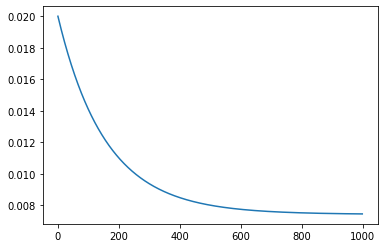

In [5]:
#Heston: Vol
n=1000
sigma = 0.225
kappa = 2
theta = 0.01
dt = 1/252
dw = stats.norm.rvs(size = n)*np.sqrt(dt)
nu = np.zeros(n)
nu[0] = 0.02
for i in range(1,n):
    nu[i] = (np.sqrt(nu[i-1]) + 0.5*sigma * np.sqrt(dt)*dw[t-1])**2 - kappa *(nu[i-1] - theta) * dt - 0.25* sigma**2 *dt

plt.plot(nu)

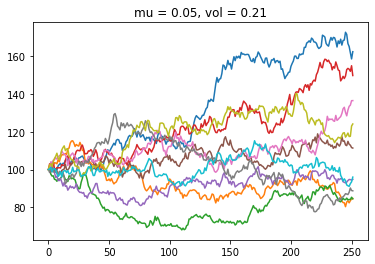

In [6]:
for t in range(10):
    plt.plot(milstein_scheme(252,0.05,0.21))

plt.title('mu = 0.05, vol = 0.21')
plt.savefig('Milstein_10sim.PNG')

### Comparing Euler vs Milstein

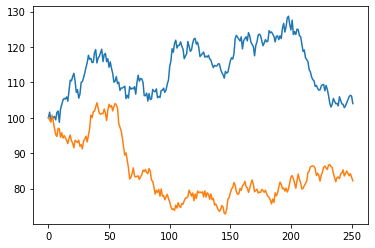

In [7]:
plt.plot(euler_scheme(252,0.05,0.21))
plt.plot(milstein_scheme(252,0.05,0.21))

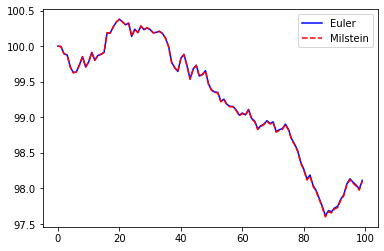

In [8]:
fig, ax = plt.subplots()

n = 100
mu = 0.0
dt = 1/n
dw = stats.norm.rvs(size = n)*np.sqrt(dt)


vol = 0.01
s_euler=np.zeros(n)
s_euler[0] = 100
for t in range(1,n):
    s_euler[t] = s_euler[t-1]+ s_euler[t-1] * mu *dt + s_euler[t-1]* vol * dw[t-1]

s_milstein = np.zeros(n)
s_milstein[0] = 100


for t in range(1,n):
    s_milstein[t] = s_milstein[t-1]+s_milstein[t-1] *mu *dt + s_milstein[t-1] * vol * dw[t-1] + 0.5 *vol**2 * s_milstein[t-1] * (dw[t-1] - dt)

    
plt.plot(s_euler,'b', label = "Euler")
plt.plot(s_milstein,'r--', label = "Milstein")

#ax.axis('equal')
leg = ax.legend();

# doesn't seems right, will look into it

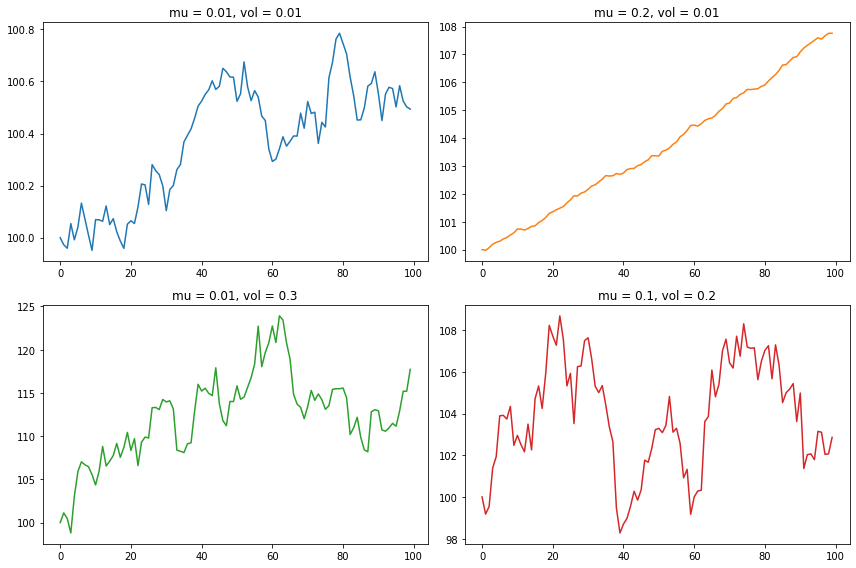

In [9]:
fig, axs = plt.subplots(2, 2,figsize = (12,8))
axs[0, 0].plot(euler_scheme(100,0.01,0.01))
axs[0, 0].set_title('mu = 0.01, vol = 0.01')
axs[0, 1].plot(euler_scheme(100,0.2,0.01), 'tab:orange')
axs[0, 1].set_title('mu = 0.2, vol = 0.01')
axs[1, 0].plot(euler_scheme(100,0.01,0.3), 'tab:green')
axs[1, 0].set_title('mu = 0.01, vol = 0.3')
axs[1, 1].plot(euler_scheme(100,0.1,0.2), 'tab:red')
axs[1, 1].set_title('mu = 0.1, vol = 0.2')

fig.tight_layout()

plt.show()
fig.savefig('Euler_Scheme_Compare.PNG')

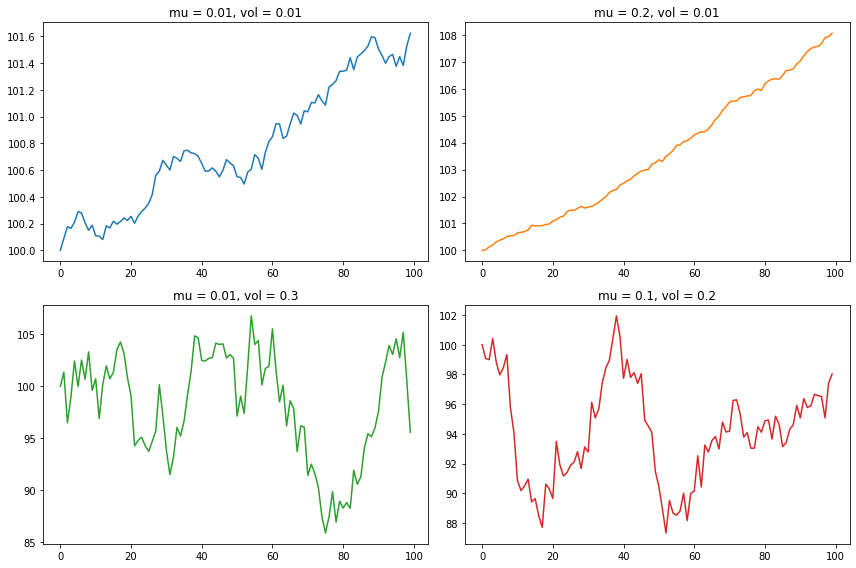

In [10]:
     
fig, axs = plt.subplots(2, 2,figsize = (12,8))
axs[0, 0].plot(milstein_scheme(100,0.01,0.01))
axs[0, 0].set_title('mu = 0.01, vol = 0.01')
axs[0, 1].plot(milstein_scheme(100,0.2,0.01), 'tab:orange')
axs[0, 1].set_title('mu = 0.2, vol = 0.01')
axs[1, 0].plot(milstein_scheme(100,0.01,0.3), 'tab:green')
axs[1, 0].set_title('mu = 0.01, vol = 0.3')
axs[1, 1].plot(milstein_scheme(100,0.1,0.2), 'tab:red')
axs[1, 1].set_title('mu = 0.1, vol = 0.2')

fig.tight_layout()

plt.show()
fig.savefig('Milstein_compare.PNG')

## Monte-Carlo Simulations:

In [11]:
def Simulation_BM(n):
    n = int(n)
    delta = 1/n
    x = []
    y = []
    value = 0
    for i in range(1,n):
        value += random.uniform(-1,1)
        x.append(i)
        y.append(value)

    plt.plot(x,y)

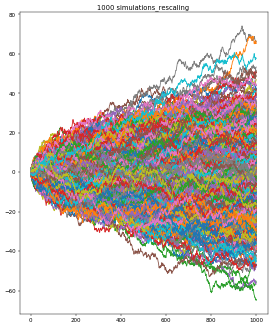

In [12]:
fig=plt.figure(figsize=(8, 10), dpi= 40, facecolor='w', edgecolor='r')
t = 0
while t <1000:
    Simulation_BM(1000)
    t+=1

plt.title('1000 simulations_rescaling')
#fig.savefig('GBM1000sim_rescaling')